What Kind of Company is Home Credit

Home Credit Group is a global non-bank financial institution that focuses on providing consumer finance to people with limited or no credit history.

They offer services such as:

Point-of-sale loans

Cash loans

Mobile and digital financial services

Their key market includes underserved populations who may not have access to traditional banking credit due to lack of formal documentation or history.

What is Expected in This Competition

The competition asks participants to build a machine learning model to predict a client's likelihood of repaying a loan- binary classification: default or not.

Participants are provided with:

Application data (features like income, employment, credit, etc.)

Historical data from previous loans and behaviors

Related external data (bureau info, credit card balance, etc.)

The goal is to predict the probability of a customer defaulting on a loan, improving credit risk assessment.


What Are the Benefits to Home Credit

Improved Credit Scoring:

Traditional credit scoring often excludes people without a credit history.

A machine learning-based model can help identify creditworthy clients among those underserved by conventional methods.

Reduced Risk:

By better identifying risky applicants, Home Credit can reduce defaults and financial losses.

Increased Reach:

With better risk assessment, the company can confidently expand to new customers in emerging markets.

Operational Efficiency:

Automated and accurate predictions reduce the burden on manual assessments.

Competitive Advantage:

Using state-of-the-art models makes their services faster and more reliable compared to traditional banks.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


C:\Users\Admin\AppData\Local\Temp\ipykernel_32\212297563.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TARGET', palette='pastel')


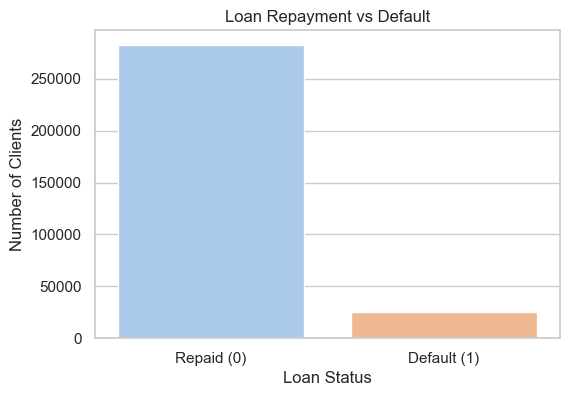

Class distribution (percent):
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


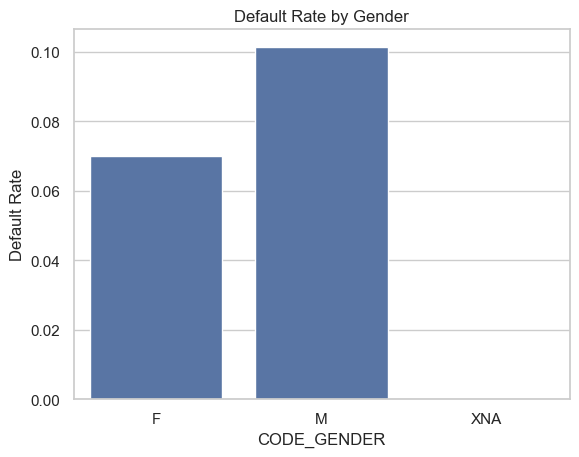

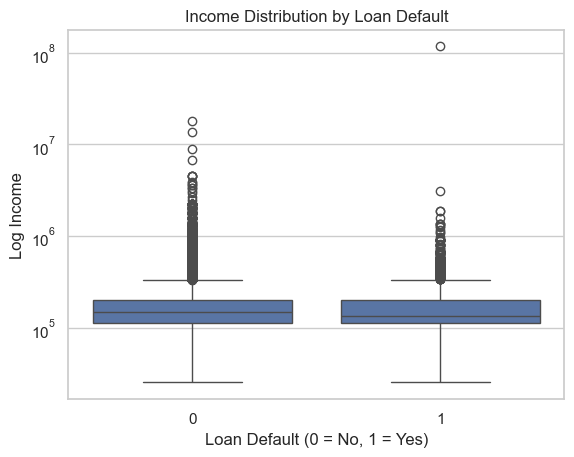

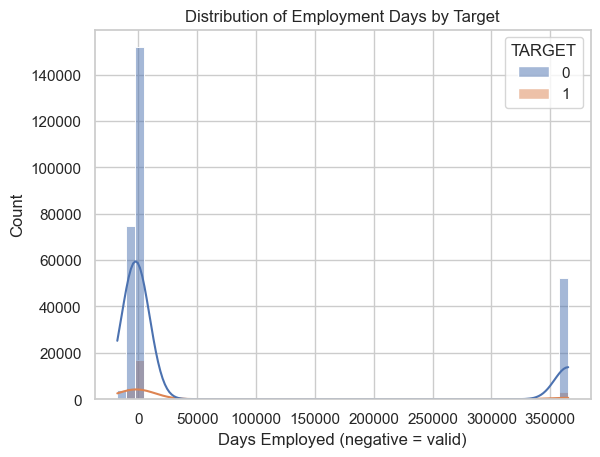

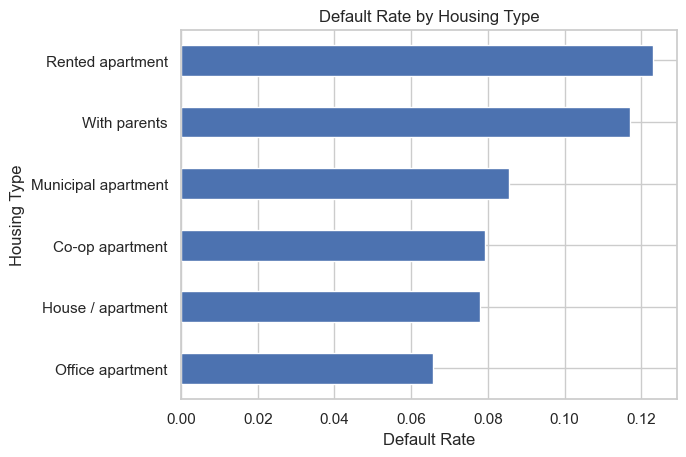

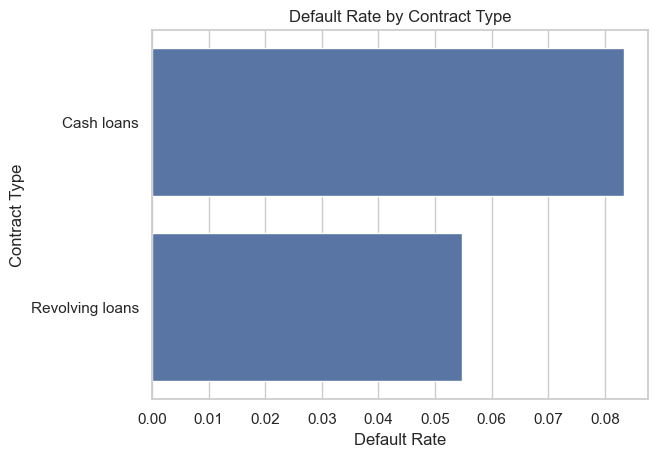

In [4]:
import pandas as pd

# Load the main training dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\application_train.csv.zip")

# Load column descriptions
column_desc = pd.read_csv(r"C:\Users\Admin\Downloads\HomeCredit_columns_description.csv", encoding='latin1')  # use latin1 if utf-8 breaks
# Display the first few rows of column descriptions
column_desc.head()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\application_train.csv.zip")


df.head()

df.info()

df.describe()

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
missing_df.head(10)


sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TARGET', palette='pastel')
plt.title('Loan Repayment vs Default')
plt.xticks([0, 1], ['Repaid (0)', 'Default (1)'])
plt.ylabel('Number of Clients')
plt.xlabel('Loan Status')
plt.show()

#percentage of each class
print("Class distribution (percent):")
print(df['TARGET'].value_counts(normalize=True) * 100)

gender_default = df.groupby('CODE_GENDER')['TARGET'].mean().reset_index()
sns.barplot(data=gender_default, x='CODE_GENDER', y='TARGET')
plt.title("Default Rate by Gender")
plt.ylabel("Default Rate")
plt.show()

sns.boxplot(data=df, x='TARGET', y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.title("Income Distribution by Loan Default")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Log Income")
plt.show()

sns.histplot(data=df, x='DAYS_EMPLOYED', bins=50, hue='TARGET', kde=True)
plt.title("Distribution of Employment Days by Target")
plt.xlabel("Days Employed (negative = valid)")
plt.show()

housing_default = df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values()
housing_default.plot(kind='barh')
plt.title("Default Rate by Housing Type")
plt.xlabel("Default Rate")
plt.ylabel("Housing Type")
plt.show()

contract_default = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
sns.barplot(data=contract_default, x='TARGET', y='NAME_CONTRACT_TYPE')
plt.title("Default Rate by Contract Type")
plt.xlabel("Default Rate")
plt.ylabel("Contract Type")
plt.show()





Questions we can explore:

Are there differences in loan default rates by gender?

Does income level affect default rates?

Are people with fewer years of employment more likely to default?

What is the distribution of loan amounts by housing type?

Are specific contract types more associated with defaults?



Arising     questions

How do credit amounts (AMT_CREDIT) relate to income and default status?

Is there a trend of higher default rates among applicants with missing information?

Do car ownership (FLAG_OWN_CAR) or property ownership (FLAG_OWN_REALTY) relate to creditworthiness?